# AUC ROC Curve

>**What is AUC ROC Curve?**

>When we need to check or visualize the performance of the multi - class classification problem, we use AUC *(Area Under The Curve)* ROC *(Receiver Operating Characteristics)* curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC *(Area Under the Receiver Operating Characteristics)*

>AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. *ROC is a probability curve and AUC represents degree or measure of separability*. It tells how much model is capable of distinguishing between classes. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
>
><cite>Understanding AUC - ROC Curve[1]</cite>
>
[1]: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

>**Confusion Matrix**

| Confusion Matrix | Actual:<br>True | Actual:<br>False |
|------------------|:---------------:|-----------------:|
| **Predicted:<br> True**  |  True Positive  |   False Positive<br><br>*Type I Error* |
| **Predicted:<br> False** |  False Negative<br><br>*Type II Error* |    True Negative |

>**True Positive** : You predict Positive and it's true.<br>
**True Negative** : You predict Negative and it's true.<br>
**False Positive** : You predict Positive and it's false. *(Type I Error)* <br>
**False Negative** : You predict Negative and its false. *(Type II Error)*

>**Recall / True Positive Rate(TPR) / Sensitivity**
>
>Out of all the Actual Positive classes, how much we predicted correctly. This should be as high as possible.
\begin{equation}
Recall = \frac{TP}{(TP + FN)}
\end{equation}
>
>Choose Recall if you can afford false positives than false negatives. For example, you can afford to label a healthy person as diabetic than (False Positive) but you cannot afford to label a diabetic person healthy (False Negative).

>**Precision**
>
>Out of all the positive classes we have predicted correctly, how many are actually positive.
\begin{equation}
Precision =  \frac{TP}{(TP + FP)}
\end{equation}
>
>Chosse Precision when you wants to be more confident of TP. You rather have a spam mail(TP- You predicted spam and it actually is also a spam) in inbox than a regular mail in a spam folder which you might never see.

>**Specificity**
>
>Specificity is the true negative rate or the proportion of negatives that are correctly identified
\begin{equation}
Specificity=\frac{TN}{FP+TN}
\end{equation}
>
>Choose Specificity if you want to cover all true negatives, meaning you don’t want any false alarms, you don’t want any false positives

>**False Positive Rate**
>
\begin{equation}
FPR = 1 - Specificity = \frac{FP}{(TN + FP)}
\end{equation}



>**Acuraccy**
>
>Out of all the classes, how much we predicted correctly. It should be high as possible.
Accuracy is the most intuitive one.
Accuracy answers the following question: How many students did we correctly label out of all the students?
>
\begin{equation}
Acuraccy = \frac{TP+TN}{TP+FP+FN+TN}
\end{equation}
>
>Accuracy is a better measure only when the dataset is symmetrical i.e. false positive and false negative are close. But if they are different then F1 is better measure

>**F-Measure**
>
It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.
\begin{equation}
F-Measure = \frac{2*Recall*Precision}{Recall+Precision}
\end{equation}

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
original_data = bank.copy()

In [4]:
bank.shape

(5000, 14)

In [5]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# 0 : Not accepted loan, 1: accepted loan 
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

4520 people didn't opted for a loan. 480 people opted for loan in the last campaign

In [7]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
#checking for the null values
bank.isnull().any()
# bank.isnull().sum()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

>As observed from above cell there are no null values in the dataset

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
# renaming column names having spaces between them
bank.rename(columns = {'ZIP Code':'Zip_Code', 'Personal Loan':'Personal_Loan', 'Securities Account':'Securities_Account', 'CD Account':'CD_Account'}, inplace = True)

In [12]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Zip_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
# dropping "ID" and "Zip_Code" from the dataset as they do not add much relevance to the models
bank.drop(columns = {'ID','Zip_Code'}, axis = 1, inplace = True)

In [15]:
len(bank.columns.to_list())

12

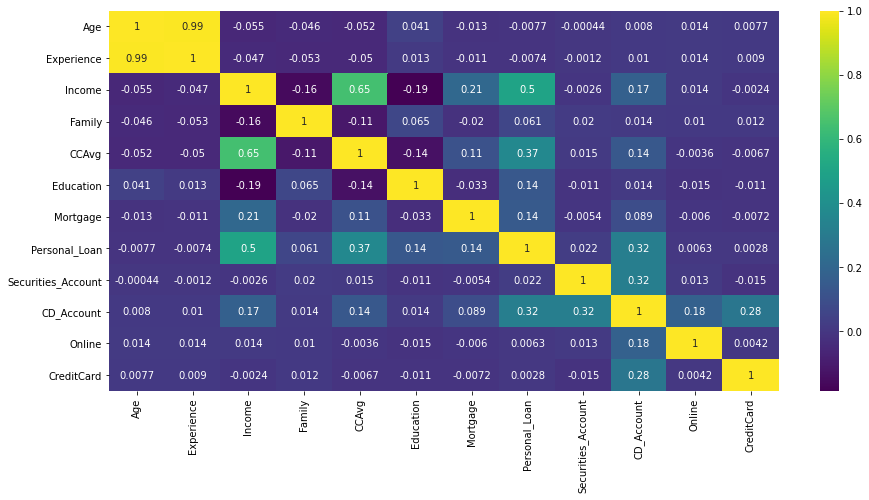

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(bank.corr(), annot=True, cmap = plt.cm.viridis)

We can observe that Experience and Income does not have much correlation with any other attributes

In [17]:
# lets see correlation w.r.t dependent variable - Personal_Loan 
bank.corr().loc['Personal_Loan']

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

>From above we can see that 'Income', 'CCAvg', 'CD_Account' are more correlated to Personal_Loan, which makes them more important for tha dataset

In [18]:
# LabelEncoder is not required.

In [19]:
# checking the variance of each attribute
bank.var()

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal_Loan             0.086801
Securities_Account        0.093519
CD_Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64

###### Checking multicollinearity using Variance Inflation Factor.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bank.values,i) for i in range(bank.shape[1])]
vif['Attirbutes']=bank.columns

In [21]:
vif

,VIF Factor,Attirbutes
0,84.664126,Age
1,31.734526,Experience
2,7.756030,Income
3,5.649978,Family
4,3.869238,CCAvg
5,7.119112,Education
6,1.376469,Mortgage
7,1.798275,Personal_Loan
8,1.276796,Securities_Account
9,1.538427,CD_Account


A rule of thumb commonly used in practise is if VIF is >10, you have high multicollinearity. Here Age and Experience are having high multicollinarity, hence we can consider removing one attribute. We will remove Age since it is having higest VIF score.

In [22]:
bank_vif = bank.drop(columns = {'Age'}, axis = 1)

In [23]:
bank_vif.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
# checking again for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bank_vif.values,i) for i in range(bank_vif.shape[1])]
vif['Attributes']=bank_vif.columns

In [25]:
vif

,VIF Factor,Attributes
0,3.440337,Experience
1,6.230608,Income
2,4.104847,Family
3,3.838763,CCAvg
4,4.439694,Education
5,1.371102,Mortgage
6,1.610501,Personal_Loan
7,1.264433,Securities_Account
8,1.528203,CD_Account
9,2.428992,Online


>As we can see from above dataframe there is no attribute with high Variance Inflation Factor. Removing Age column will not have any influence on the model however this will help to make our model computationally faster.

In [26]:
# Making dummy variables for Education
df_with_dummies = pd.get_dummies(bank_vif, prefix='Category_', columns=['Education'])

In [27]:
df_with_dummies.head()

,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Category__1,Category__2,Category__3
0,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [28]:
# dropping 'Category_3' to prevent the model from dummy trap
df_with_dummies.drop(columns={'Category__3'}, inplace=True)

In [29]:
df_with_dummies.rename(columns = {'Category__1' : 'Undergraduate', 'Category__2' : 'Graduate'}, inplace = True)

In [30]:
df_with_dummies.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Undergraduate', 'Graduate'],
      dtype='object')

### Logistic Regression

In [87]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop(columns = {'Personal_Loan'})
y = df_with_dummies['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [94]:
# Checking the shape of training sets and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 11)
(1500, 11)
(3500,)
(1500,)


In [95]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
# Fitting the model on training data
from sklearn.linear_model import LogisticRegression
# logisticregression = LogisticRegression()
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
#predict on X_test
y_pred = logisticregression.predict(X_test)

In [102]:
# printing the coefficient and intercept 
print(logisticregression.coef_)
print("Intercept of the model is: {}".format(logisticregression.intercept_))

[[ 0.06657912  2.71657021  0.61628234  0.42939277  0.10553583 -0.2345709
   0.91383926 -0.42381704 -0.43710833 -2.08421042  0.02617329]]
Intercept of the model is: [-5.02562839]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

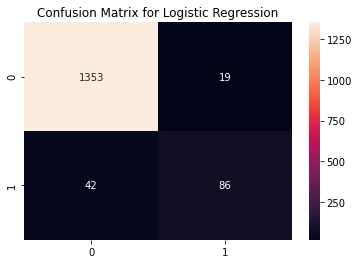

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Logistic Regression")

In [104]:
print("The accuracy score for Logistic Regression model is: {0:.2f}".format(accuracy_score(y_test, y_pred)))

The accuracy score for Logistic Regression model is: 0.96


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.82      0.67      0.74       128

    accuracy                           0.96      1500
   macro avg       0.89      0.83      0.86      1500
weighted avg       0.96      0.96      0.96      1500



In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, (logisticregression.predict(X_test)))

0.8290133017492711

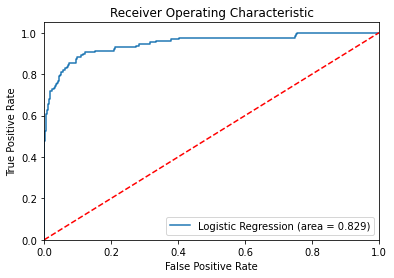

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logistic_roc_auc = roc_auc_score(y_test, logisticregression.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, logisticregression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.3f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()